# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В нашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Нужно построить модель для определения стоимости автомобилей. 

<b>Заказчику важны</b>:
- качество предсказания
- скорость предсказания
- время обучения

<b>Задачи</b>:
1. Сделать предобработку данных и подготовить данные к обучению моделей:
- заполнить пропуски
- обработать аномалии
- подготовить выборки
2. Обучить разные модели, одна из которых — LightGBM и минимум одна - не бустинг.
3. Проанализировать время обучения, время предсказания и качество моделей.
4. Для оценки качества моделей применить метрику RMSE (значение должно быть меньше 2500).
5. Выбрать лучшую модель по критериям заказчика и проверить её качество на тестовой выборке.

<br>
<b>Описание данных</b>

Признаки:
- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- NotRepaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя

Целевой признак: Price — цена (евро)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Типы-данных-и-ненужные-столбцы" data-toc-modified-id="Типы-данных-и-ненужные-столбцы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Типы данных и ненужные столбцы</a></span></li><li><span><a href="#Обработка-пропусков-и-дубликатов" data-toc-modified-id="Обработка-пропусков-и-дубликатов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обработка пропусков и дубликатов</a></span></li><li><span><a href="#Аномалии" data-toc-modified-id="Аномалии-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Аномалии</a></span></li><li><span><a href="#Корреляция-данных" data-toc-modified-id="Корреляция-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Корреляция данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных-к-обучению" data-toc-modified-id="Подготовка-данных-к-обучению-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка данных к обучению</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений-и-Cлучайный-лес" data-toc-modified-id="Дерево-решений-и-Cлучайный-лес-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Дерево решений и Cлучайный лес</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>LightGBM</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# для разделения выборок
from sklearn.model_selection import train_test_split
# для кодировки категориальных данных
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
# для масштабирования численных данных
from sklearn.preprocessing import StandardScaler
# для создания pipeline
from sklearn.pipeline import Pipeline, make_pipeline
# для подбора параметров GridSearchCV
from sklearn.model_selection import GridSearchCV
# для кросс-валидации
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
# для метрики RMSE
from sklearn.metrics import mean_squared_error
# для выявления важности признаков
from sklearn.inspection import permutation_importance

# модель Случайный лес
from sklearn.ensemble import RandomForestRegressor
# модель Дерево решений
from sklearn.tree import DecisionTreeRegressor
# модель Линейная регрессия
from sklearn.linear_model import LinearRegression
# библиотека CatBoost
from catboost import CatBoostRegressor
# библиотека LightGBM
from lightgbm import LGBMRegressor

# убрать предупреждение SettingWithCopy от библиотек pandas и sklearn
pd.options.mode.chained_assignment = None

In [2]:
# загрузим датасет и посмотрим на данные
data = pd.read_csv('autos.csv')
data.head(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

### Типы данных и ненужные столбцы

Сразу удалим столбцы, которые не нужны для обучения моделей, предварительно проверив даты последнего скачивания анкеты из базы и создания анкеты: 
- DateCrawled — дата скачивания анкеты из базы, 
- DateCreated — дата создания анкеты, 
- PostalCode — почтовый индекс владельца анкеты (пользователя), 
- LastSeen — дата последней активности пользователя.

In [4]:
data['DateCrawled'].max()

'2016-04-07 14:36:58'

In [5]:
data['DateCreated'].max()

'2016-04-07 00:00:00'

In [6]:
data = data.drop(['DateCrawled','DateCreated','PostalCode','LastSeen'], axis=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              354369 non-null  int64 
 1   VehicleType        316879 non-null  object
 2   RegistrationYear   354369 non-null  int64 
 3   Gearbox            334536 non-null  object
 4   Power              354369 non-null  int64 
 5   Model              334664 non-null  object
 6   Kilometer          354369 non-null  int64 
 7   RegistrationMonth  354369 non-null  int64 
 8   FuelType           321474 non-null  object
 9   Brand              354369 non-null  object
 10  NotRepaired        283215 non-null  object
 11  NumberOfPictures   354369 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 32.4+ MB


Оставшиеся столбцы переимунем в стиль snake_case для дальнейшего удобства.

In [8]:
data = data.rename(columns={
    'Price': 'price', 
    'VehicleType': 'vehicle_type',
    'RegistrationYear': 'year', 
    'Gearbox': 'gearbox', 
    'Power': 'power', 
    'Model': 'model', 
    'Kilometer': 'km', 
    'RegistrationMonth': 'month', 
    'FuelType': 'fuel_type', 
    'Brand': 'brand',
    'NotRepaired': 'repaired', 
    'NumberOfPictures': 'photos'
})

In [9]:
data.columns

Index(['price', 'vehicle_type', 'year', 'gearbox', 'power', 'model', 'km',
       'month', 'fuel_type', 'brand', 'repaired', 'photos'],
      dtype='object')

In [10]:
print(data['year'].unique())
data['year'].max()

[1993 2011 2004 2001 2008 1995 1980 2014 1998 2005 1910 2016 2007 2009
 2002 2018 1997 1990 2017 1981 2003 1994 1991 1984 2006 1999 2012 2010
 2000 1992 2013 1996 1985 1989 2015 1982 1976 1983 1973 1111 1969 1971
 1987 1986 1988 1970 1965 1945 1925 1974 1979 1955 1978 1972 1968 1977
 1961 1960 1966 1975 1963 1964 5000 1954 1958 1967 1959 9999 1956 3200
 1000 1941 8888 1500 2200 4100 1962 1929 1957 1940 3000 2066 1949 2019
 1937 1951 1800 1953 1234 8000 5300 9000 2900 6000 5900 5911 1933 1400
 1950 4000 1948 1952 1200 8500 1932 1255 3700 3800 4800 1942 7000 1935
 1936 6500 1923 2290 2500 1930 1001 9450 1944 1943 1934 1938 1688 2800
 1253 1928 1919 5555 5600 1600 2222 1039 9996 1300 8455 1931 1915 4500
 1920 1602 7800 9229 1947 1927 7100 8200 1946 7500 3500]


9999

In [11]:
data['power'].max()

20000

In [12]:
data['month'].unique()

array([ 0,  5,  8,  6,  7, 10, 12, 11,  2,  3,  1,  4,  9])

In [13]:
data['photos'].unique()

array([0])

В столбцах с годом регистрации и мощностью значения максимум до 20000. Можем изменить тип данных на int16. 

В столбце с месяцами заменим тип на int8. 

В столбце с кол-во фото все значения 0, можно совсем удалить этот столбец.

In [14]:
data = data.drop('photos', axis=1)

In [15]:
data['year'] = data['year'].astype('int16')
data['power'] = data['power'].astype('int16')
data['month'] = data['month'].astype('int8')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         354369 non-null  int64 
 1   vehicle_type  316879 non-null  object
 2   year          354369 non-null  int16 
 3   gearbox       334536 non-null  object
 4   power         354369 non-null  int16 
 5   model         334664 non-null  object
 6   km            354369 non-null  int64 
 7   month         354369 non-null  int8  
 8   fuel_type     321474 non-null  object
 9   brand         354369 non-null  object
 10  repaired      283215 non-null  object
dtypes: int16(2), int64(2), int8(1), object(6)
memory usage: 23.3+ MB


Уменьшили размер датасета с 32.4 до 23.3 MB.

Рассмотрим столбец 'repaired'.

In [17]:
data['repaired'].unique()

array([nan, 'yes', 'no'], dtype=object)

Заполним пропущенные значения на 'no', так как скорее всего, если пользователь не заполнил это значение, машина не была в ремонте.

In [18]:
data['repaired'] = data['repaired'].fillna('no')

Теперь можно заменить значения 'no' на 0, а 'yes' на 1. И затем изменить тип данных на int8.

In [19]:
data['repaired'] = data['repaired'].map({'yes': 1, 'no': 0})

In [20]:
data['repaired'] = data['repaired'].astype('int8')

Удалили все ненужные столбцы. Изменили типы данных на менее ресурсозатратные. Приступим к пропускам.

### Обработка пропусков и дубликатов

In [21]:
# Проверим датасет на дубликаты - более 30К. Удалим их
data.duplicated().sum()

30890

In [22]:
data = data.drop_duplicates().reset_index(drop=True)

Теперь рассмотрим все пропуски в датасете.

In [23]:
data.isna().sum()

price               0
vehicle_type    35087
year                0
gearbox         17524
power               0
model           18462
km                  0
month               0
fuel_type       31038
brand               0
repaired            0
dtype: int64

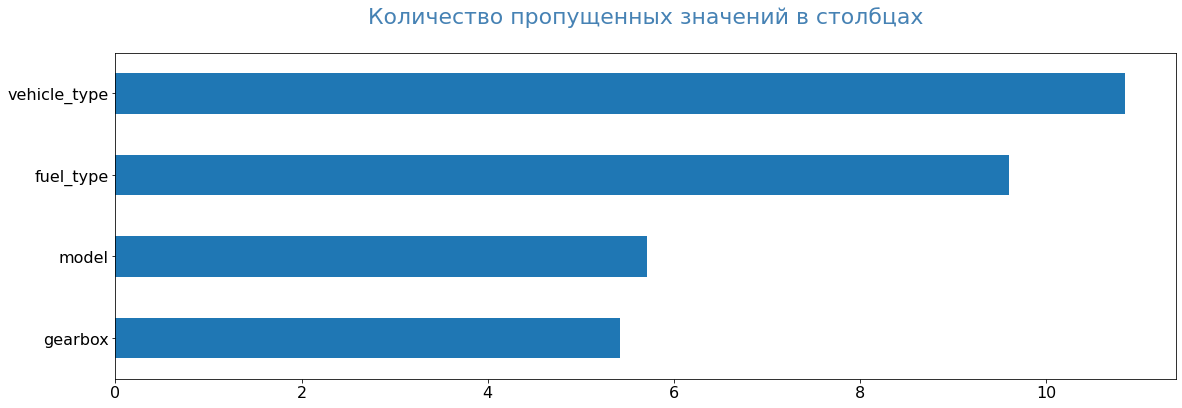

In [24]:
# пропущенные значения на графике
def pass_value_barh(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), legend = False, fontsize = 16)
        .set_title('Количество пропущенных значений в столбцах' + "\n", fontsize = 22, color = 'SteelBlue')    
    ); 

pass_value_barh(data)

Столбец "gearbox". Есть два значения: ручная и автоматическая коробка передач. Автомобилей с ручной коробкой передач намного больше в жизни. Логично предположить, если пользователь не указал тип коробки передач, то скорее всего у него ручная. Также, возможно, по умолчанию в приложении установлено значение 'manual', но по технической причине эти данные не записались в анкету пользователя. Заполним все пропуски в столбце 'gearbox' на 'manual'.

In [25]:
data['gearbox'].value_counts()

manual    245370
auto       60585
Name: gearbox, dtype: int64

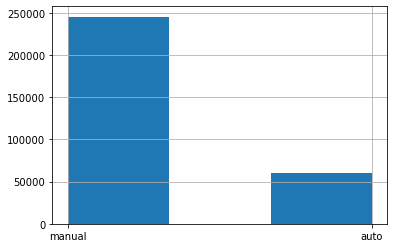

In [26]:
data['gearbox'].hist(bins=3);

In [27]:
data['gearbox'] = data['gearbox'].fillna('manual')

In [28]:
data['gearbox'].value_counts()

manual    262894
auto       60585
Name: gearbox, dtype: int64

Аналогично со столбцом 'fuel_type'. Большинство автомобилей ездят на бензине. Если пользователь не заполнил этот признак, скорее всего он заправляет авто бензином. Заполним пропуски в этом столбце на 'petrol'.

In [29]:
data['fuel_type'].value_counts()

petrol      197915
gasoline     88593
lpg           4889
cng            527
hybrid         228
other          200
electric        89
Name: fuel_type, dtype: int64

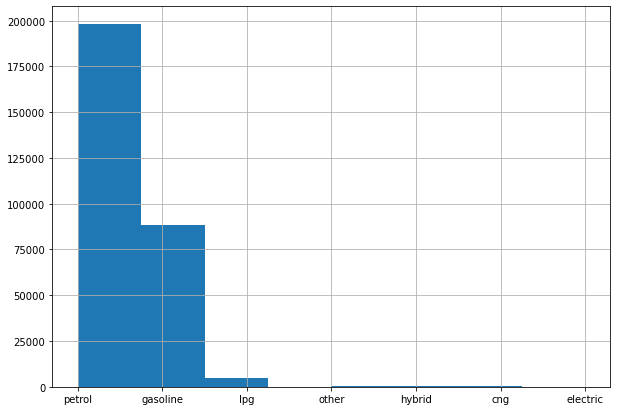

In [30]:
data['fuel_type'].hist(bins=8, figsize=(10, 7));

In [31]:
data['fuel_type'] = data['fuel_type'].fillna('petrol')

Со столбцами 'vehicle_type' и 'model' хуже. По имеющимся данным мы не можем заполнить недостающие признаки. 

Среди типов кузова есть 3 популярных типа с большим количеством автомобилей. Авто одной модели или бренда может иметь разные типы кузова. 

Среди моделей тоже есть часто встречающиеся. Невозможно определить тип модели по известному бренду автомобиля.

Создадим отдельное значение для неизвестных данных - unknown и заполним им все оставшиеся пропуски.

In [32]:
data['vehicle_type'].value_counts()

sedan          82622
small          72550
wagon          58972
bus            26580
convertible    18589
coupe          15001
suv            10909
other           3169
Name: vehicle_type, dtype: int64

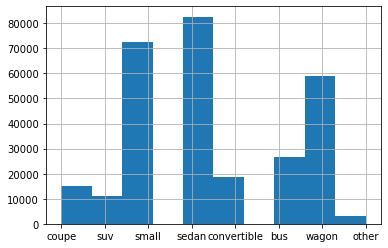

In [33]:
data['vehicle_type'].hist();

In [34]:
data['model'].value_counts().head(10)

golf        26060
other       23097
3er         17805
polo        11748
corsa       11148
astra        9867
passat       8980
a4           8754
c_klasse     7470
5er          7015
Name: model, dtype: int64

In [35]:
data['vehicle_type'] = data['vehicle_type'].fillna('unknown')
data['model'] = data['model'].fillna('unknown')

In [36]:
# проверим датасет на пропуски - пропусков нет
data.isna().sum()

price           0
vehicle_type    0
year            0
gearbox         0
power           0
model           0
km              0
month           0
fuel_type       0
brand           0
repaired        0
dtype: int64

Заполнили все пропуски и удалили дубликаты в датасете.

### Аномалии

Мы ранее рассмотрели значения в категориальных признаках. Сейчас внимательнее изучим численные признаки.

In [37]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,323479.0,4408.007487,4523.118417,0.0,1000.0,2700.0,6390.0,20000.0
year,323479.0,2004.252159,91.571014,1000.0,1999.0,2003.0,2008.0,9999.0
power,323479.0,110.267646,196.814871,0.0,69.0,105.0,141.0,20000.0
km,323479.0,128068.947289,38009.696049,5000.0,125000.0,150000.0,150000.0,150000.0
month,323479.0,5.693433,3.724624,0.0,3.0,6.0,9.0,12.0
repaired,323479.0,0.106433,0.308392,0.0,0.0,0.0,0.0,1.0


Начнем с целевого признака - цены. В сводной таблице видим значения 0. Для обучения модели нам не нужны нулевые целевые данные. Удалим эти объекты. Максимальная цена в 20000 евро - допустимая цена для редких/раритетных или премиум автомобилей.

In [38]:
# 9293 автомобиля без цены
data[data['price'] == 0]

,price,vehicle_type,year,gearbox,power,model,km,month,fuel_type,brand,repaired
7,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,0
40,0,unknown,1990,manual,0,corsa,150000,1,petrol,opel,0
111,0,unknown,2017,manual,0,golf,5000,12,petrol,volkswagen,0
115,0,small,1999,manual,0,unknown,5000,0,petrol,volkswagen,0
152,0,bus,2004,manual,101,meriva,150000,10,lpg,opel,1
...,...,...,...,...,...,...,...,...,...,...,...
323344,0,unknown,2000,manual,65,corsa,150000,0,petrol,opel,1
323372,0,small,2002,manual,60,fiesta,150000,3,petrol,ford,0
323381,0,small,1999,manual,53,swift,150000,3,petrol,suzuki,0
323406,0,small,1999,manual,37,arosa,150000,7,petrol,seat,1


In [39]:
data = data[data['price'] != 0]

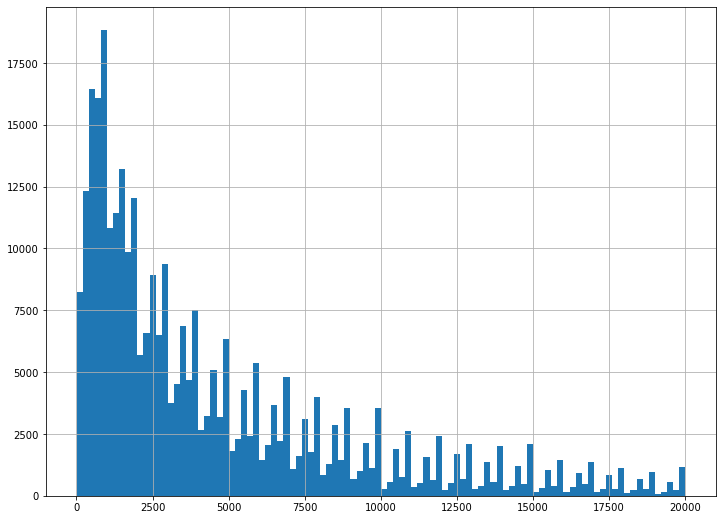

In [40]:
data['price'].hist(bins=100, figsize=(12,9));

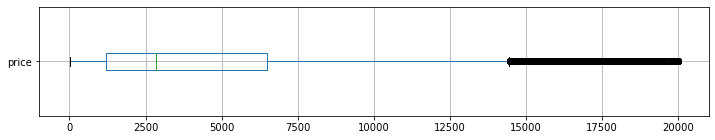

In [41]:
data.boxplot(column='price', figsize=(12, 2), vert=False);

In [42]:
# выделим 5 квантиль
data['price'].quantile([.05])

0.05    350.0
Name: price, dtype: float64

350 евро - это чуть больше 20000 рублей (в наших реалиях 2022 года 🙃). Это минимальная цена для продажи подержанного авто. Меньше точно быть не может, если только автомобиль не продают/отдают на металлолом или это были ошибки при заполнении формы. Но для обучения модели нам такие автомобили не нужны. Удалим автомобили дешевле 350 евро.

In [43]:
data = data[data['price'] >= 350]

Первый автомобиль в истории человечества был создан в 1886 году. В нашем датасете есть редкие старинные автомобили, но все они зарегистрированы не ранее 1910 года. Более ранние года - это ошибочные значения.

В датасете последние данные о скачивании или создании анкеты датируются 2016 годом. Года после 2016 - это аномалии. Удалим все аномалии в этом столбце. 

In [44]:
data['year'].sort_values().unique()

array([1000, 1001, 1039, 1111, 1234, 1300, 1400, 1500, 1600, 1602, 1800,
       1910, 1923, 1925, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1940, 1941, 1942, 1943, 1944, 1945, 1946,
       1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2066, 2290, 2500, 2800,
       2900, 3000, 3200, 3700, 3800, 4000, 4100, 4500, 4800, 5000, 5300,
       5555, 5911, 6000, 7000, 7100, 7800, 8200, 8500, 8888, 9000, 9450,
       9999], dtype=int16)

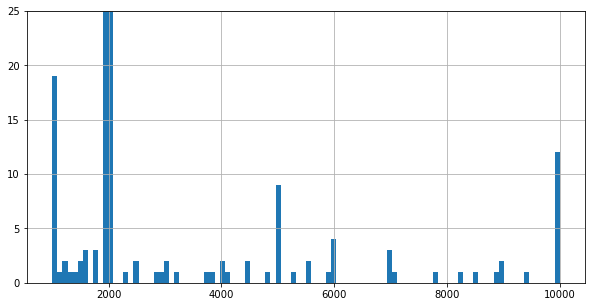

In [45]:
plt.ylim(0, 25)
data['year'].hist(bins=100, figsize=(10, 5));

In [46]:
data = data.loc[(data['year'] >= 1910) & (data['year'] < 2017)]

Посмотрим на столбец мощности. Много значений есть выше 5000 л.с., хотя такие машины еще не созданы. Это выбросы. Удалим все, что выше 5000.

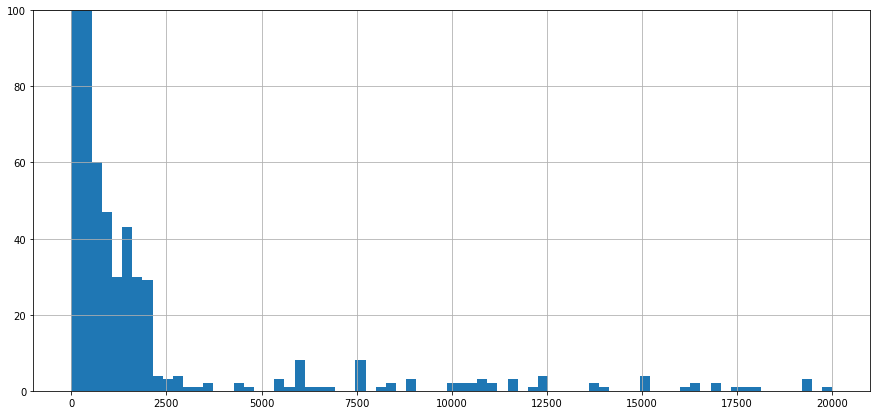

In [47]:
plt.ylim(0, 100)
data['power'].hist(bins=75, figsize=(15, 7));

In [48]:
data[data['power'] > 5000]

,price,vehicle_type,year,gearbox,power,model,km,month,fuel_type,brand,repaired
7633,1499,small,1999,manual,7515,lupo,150000,4,petrol,volkswagen,0
24966,10900,bus,2009,manual,10520,caddy,150000,6,gasoline,volkswagen,0
33468,3740,small,2006,manual,6920,aygo,90000,10,petrol,toyota,0
43773,2500,convertible,1998,manual,7512,golf,150000,6,petrol,volkswagen,0
44297,15800,convertible,2014,auto,10218,fortwo,30000,3,petrol,smart,0
...,...,...,...,...,...,...,...,...,...,...,...
301815,850,small,2000,manual,8500,corsa,150000,3,petrol,opel,0
310998,600,sedan,2000,manual,10110,focus,125000,12,petrol,ford,0
312425,1899,other,2006,manual,7518,berlingo,125000,11,petrol,citroen,1
316929,1300,sedan,2000,manual,12512,carisma,150000,9,petrol,mitsubishi,0


In [49]:
data = data[data['power'] <= 5000]

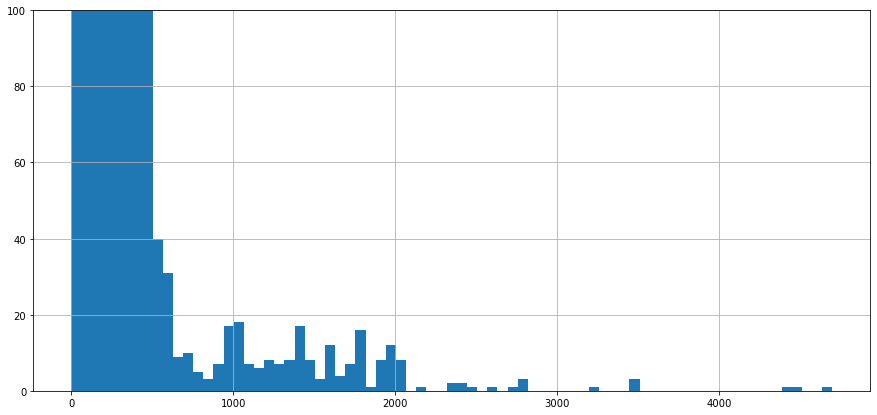

In [50]:
plt.ylim(0, 100)
data['power'].hist(bins=75, figsize=(15, 7));

In [51]:
# проверим авто свыше 3000 л.с.
data[data['power'] >= 3000]

,price,vehicle_type,year,gearbox,power,model,km,month,fuel_type,brand,repaired
92707,1000,small,1996,manual,4400,ibiza,90000,9,petrol,seat,1
116690,650,wagon,1997,auto,3199,e_klasse,30000,6,petrol,mercedes_benz,0
126284,4500,sedan,2001,auto,3454,e_klasse,150000,6,petrol,mercedes_benz,0
136552,8600,other,2007,manual,3500,other,150000,12,petrol,volkswagen,0
259753,500,sedan,1997,manual,4700,polo,150000,4,petrol,volkswagen,0
296537,8600,other,2007,auto,3500,transporter,150000,12,petrol,volkswagen,0
312210,449,unknown,2016,manual,4507,corsa,150000,4,petrol,opel,0


Все эти автомобили не могут иметь мощность выше 3000 л.с. Это ошибки в данных. Удалим эти авто.

In [52]:
data = data[data['power'] <= 3000]

In [53]:
# проверим авто с 0 мощностью - 25604 автомобиля
data[data['power'] == 0]

,price,vehicle_type,year,gearbox,power,model,km,month,fuel_type,brand,repaired
0,480,unknown,1993,manual,0,golf,150000,0,petrol,volkswagen,0
15,450,small,1910,manual,0,ka,5000,0,petrol,ford,0
37,1500,unknown,2016,manual,0,kangoo,150000,1,gasoline,renault,0
54,4700,wagon,2005,manual,0,signum,150000,0,petrol,opel,0
55,550,wagon,1999,manual,0,astra,150000,8,gasoline,opel,1
...,...,...,...,...,...,...,...,...,...,...,...
323438,400,wagon,1991,manual,0,legacy,150000,0,petrol,subaru,0
323449,7900,bus,2007,manual,0,b_klasse,125000,1,petrol,mercedes_benz,0
323451,390,small,1997,auto,0,corsa,100000,6,petrol,opel,1
323459,2600,unknown,2005,auto,0,c_klasse,150000,9,petrol,mercedes_benz,0


Для анализа выведем одинаковые по бренду/модели/типу двигателя автомобили с нулевой мощностью. И отдельно те же автомобили с ненулевой мощностью.

In [54]:
data[(data['brand'] == 'opel') & (data['model'] == 'corsa') & \
     (data['power'] == 0) & (data['vehicle_type'] == 'small')]

,price,vehicle_type,year,gearbox,power,model,km,month,fuel_type,brand,repaired
110,350,small,1998,manual,0,corsa,150000,2,petrol,opel,0
912,2399,small,2004,manual,0,corsa,150000,11,gasoline,opel,0
1199,555,small,1999,manual,0,corsa,90000,3,petrol,opel,0
1776,3600,small,2009,manual,0,corsa,100000,2,petrol,opel,0
2142,400,small,1995,auto,0,corsa,125000,10,petrol,opel,0
...,...,...,...,...,...,...,...,...,...,...,...
322308,950,small,1994,auto,0,corsa,100000,0,petrol,opel,0
322611,500,small,1996,manual,0,corsa,150000,0,petrol,opel,1
322969,850,small,2003,manual,0,corsa,125000,0,petrol,opel,0
323204,1100,small,2000,manual,0,corsa,125000,6,petrol,opel,0


In [55]:
data[(data['brand'] == 'opel') & (data['model'] == 'corsa') & \
     (data['power'] != 0) & (data['vehicle_type'] == 'small')]

,price,vehicle_type,year,gearbox,power,model,km,month,fuel_type,brand,repaired
251,500,small,1999,manual,56,corsa,150000,8,petrol,opel,0
347,500,small,1996,manual,45,corsa,70000,4,petrol,opel,0
354,9999,small,2014,manual,90,corsa,20000,9,petrol,opel,0
395,500,small,1995,manual,45,corsa,150000,5,petrol,opel,0
399,650,small,1997,manual,45,corsa,150000,1,petrol,opel,0
...,...,...,...,...,...,...,...,...,...,...,...
323250,1400,small,2001,manual,90,corsa,150000,12,petrol,opel,0
323291,450,small,2000,manual,60,corsa,150000,5,lpg,opel,0
323324,1500,small,2005,manual,70,corsa,125000,3,gasoline,opel,0
323411,3500,small,2001,manual,75,corsa,90000,4,petrol,opel,0


Видим, что цены не зависят от нулевой мощности и ненулевой. Скорее всего это ошибка данных при заполнении формы (или по умолчанию в форме установлено нулевое значение и его не все пользователи заполняют). Мощность двигателя - это один из важных факторов, от которых зависит цена автомобиля. Ошибочные данные для обучения модели нам ни к чему. Удалим их.

In [56]:
data = data[data['power'] != 0]

Столбец с пробегом автомобилей не содержит аномальных данных. В столбце с месяцем регистрации автомобиля есть нулевые значения, но не будем их менять, эти нулевые данные не повлияют на обучение модели.

Датасет полностью готов для обучения модели. В данных нет дубликатов, аномалий, пропусков.

### Корреляция данных

Рассмотрим зависимости признаков между собой.

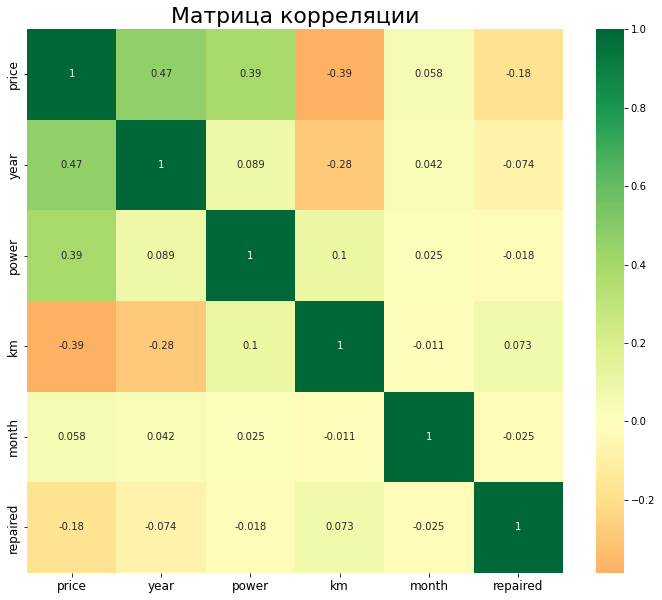

In [57]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, \
            cmap='RdYlGn', center=0, annot=True)
plt.title('Матрица корреляции', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Нет численных признаков, сильно коррелирующих между собой (больше 0.47). Признаки "мощность" и "год регистрации автомобиля" коррелируют с ценой сильнее других.

Рассмотрим зависимость категориальных признаков и цены.

В датасете есть разные по "возрасту" машины: от супер-старых до "новых". Проверим гипотезу, что для разных возрастов существует свое ценообразование. Добавим столбец "age" для классификации автомобилей по возрасту, а потом посмотрим корреляцию с ценой.

In [58]:
def type_age(row):
    try:
        if row['year'] <= 1918:
            return 'супер-ретро'
        elif 1918 < row['year'] <= 1945:
            return 'ретро'
        elif 1945 < row['year'] <= 1970:
            return 'винтаж'
        elif 1970 < row['year'] <= 2000:
            return 'старая'
        elif 2000 < row['year'] <= 2010:
            return 'средняя'
        elif 2010 < row['year'] <= 2016:
            return 'новая'
        else:
            return 'ошибка'
    except:
        pass

# Создадим столбец с типом этажа, применив функцию   
data['age'] = data[['year']].apply(type_age, axis=1)

In [59]:
# Проверим столбец
data['age'].head(10)

1       новая
2     средняя
3     средняя
4     средняя
5      старая
6     средняя
8       новая
9      старая
10    средняя
11    средняя
Name: age, dtype: object

In [60]:
# функция распределения
def corr_cat_price(col):
    plt.figure(figsize=(15, 7))
    data.groupby(col).median()['price'].sort_values(ascending=False).plot.bar()
    plt.title(f'Распределение категории {col}')
    plt.xlabel(col)
    plt.ylabel('Цена')
    plt.show()

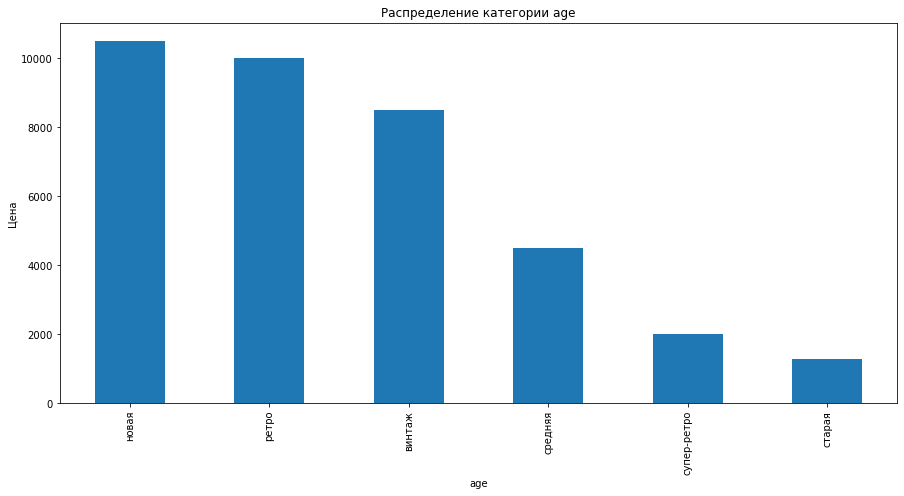

In [61]:
# возраст авто и цена
corr_cat_price('age')

Как и предполагалось, самые дорогие новые автомобили, затем ретро и винтаж. Самые дешевые автомобили те, которые еще не считаются "средними" или более древними, еще скорее всего "на ходу", но требуют постоянного ухода и ремонта. Супер-ретро автомобили скорее всего нерабочие и скупаются только для коллекций, чтобы стоять в гараже.

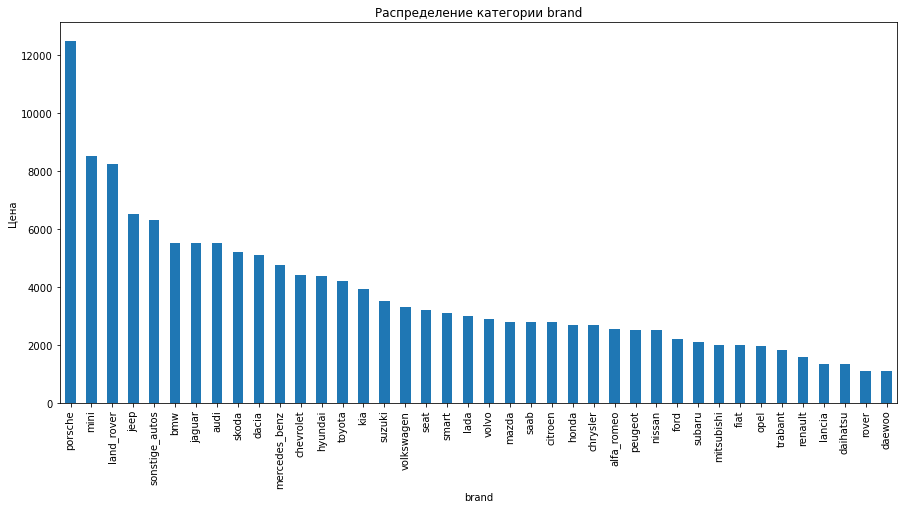

In [62]:
# бренд авто и цена
corr_cat_price('brand')

Автомобили бренда Porsche значительно дороже остальных брендов.

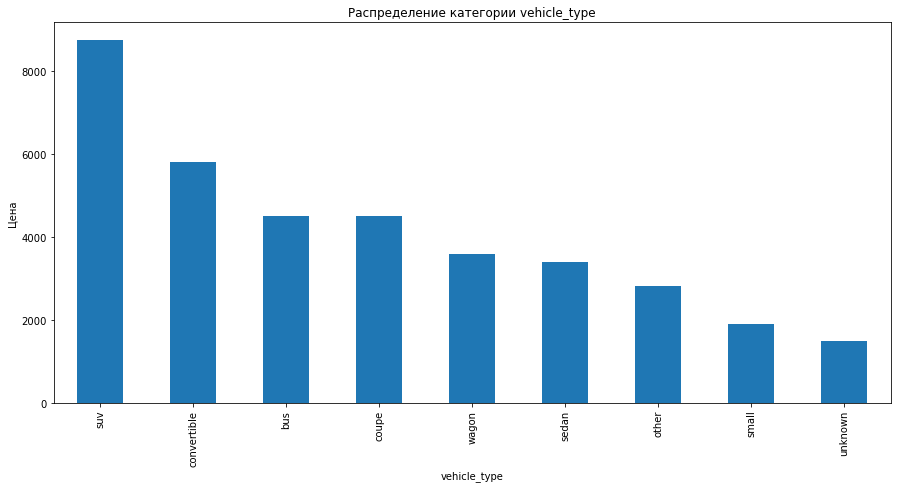

In [63]:
# тип кузова авто и цена
corr_cat_price('vehicle_type')

Спортивные автомобили (sport utility vehicle) стоят дороже автомобилей с другим типом кузова.

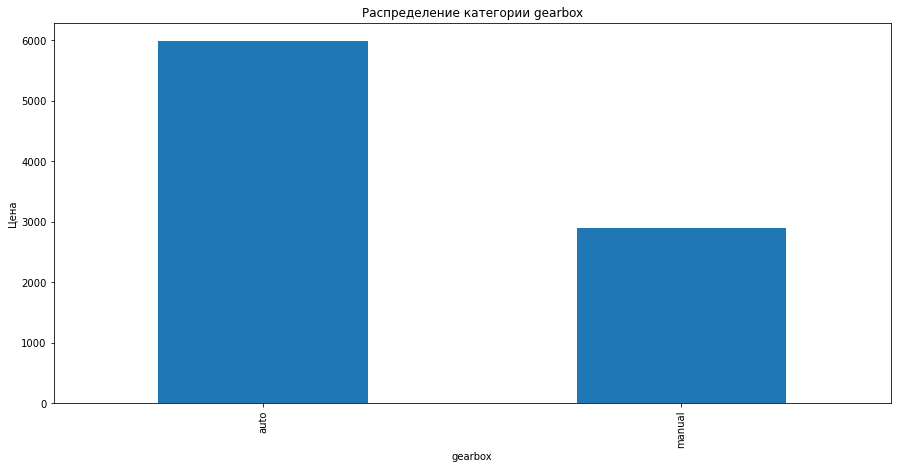

In [64]:
# коробка передач авто и цена
corr_cat_price('gearbox')

Цена у автомобилей с автоматической коробкой передач выше, чем у автомобилей с ручной коробкой передач.

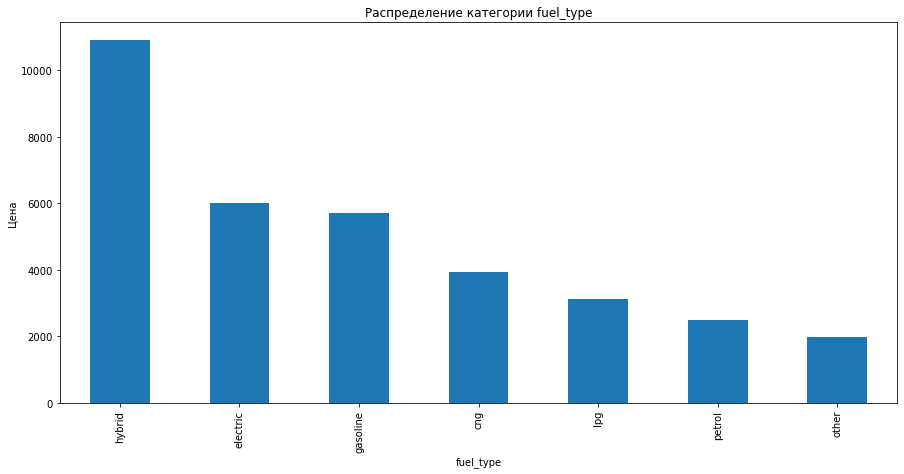

In [65]:
# тип топлива авто и цена
corr_cat_price('fuel_type')

Самые дорогие автомобили используют два источника энергии — горючие нефтепродукты и электричество.

### Вывод

В рамках этого пункта:
- изменили типы данных для уменьшения датасета, это ускорит обращение к памяти при обучении модели
- удалили ненужные для обучения модели столбцы
- заполнили все пропуски, удалили дубликаты
- удалили аномалии и выбросы
- рассмотрели зависимость между признаками и целевым признаком
- данные полностью готовы для обучения моделей

## Обучение моделей

### Подготовка данных к обучению

Для начала нужно создать переменные для признаков и целевого признака из нашего датасета. Целевой признак в данном проекте - стоимость автомобиля - столбец "price". 

Нам нужны три выборки: обучающая (для обучения модели), валидационная (для применения гиперпараметров) и тестовая (для итоговой проверки). Так как "спрятанной" тестовой выборки у нас нет, будем делить данные на три части в соотношении 3:1:1 (60%:20%:20%). Сперва разобьем наши данные на 2 выборки (обучающую и дополнительную) в пропорции 60% и 40%. Затем разделим меньшую (дополнительную) выборку еще на 2 части пополам, так мы получим валидационную и тестовую выборки.

In [66]:
features = data.drop('price', axis=1)
target = data['price']

In [67]:
features_train, features_valid_test, target_train, target_valid_test = \
train_test_split(features, target, train_size=0.6, random_state=2501)

In [68]:
# проверим размеры
print(features_train.shape)
features_valid_test.shape

(156600, 11)


(104400, 11)

In [69]:
features_valid, features_test, target_valid, target_test = \
train_test_split(features_valid_test, target_valid_test, test_size=0.5, random_state=2501)

In [70]:
# проверим размеры
print(features_valid.shape)
features_test.shape

(52200, 11)


(52200, 11)

Для обучения разных моделей нужны разные типы кодировки категориальных данных.
- Для библиотеки CatBoost не нужно кодировать категориальные признаки, просто укажем список категориальных признаков в параметрах модели.
- Деревянные модели (Решающее дерево и Случайный лес) справятся с кодировщиком OrdinalEncoder. Также они хорошо обучаются на данных с разным масштабом числовых признаков.
- Для Линейной регрессии нужен кодировщик OneHotEncoder, чтобы не придавать веса категориям с большим числовым кодом. И дополнительно для нее масштабируем числовые признаки.

In [71]:
# список категориальных признаков
categorial = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'age']
# список численных признаков
numerical = ['year', 'power', 'km', 'month', 'repaired']

### Обучение моделей

#### Дерево решений и Cлучайный лес

Для моделей Дерево решений и Случайный лес закодируем категориальные данные с помощью кодировщика OrdinalEncoder(). Чтобы не было утечки данных из тренировочной в тестовую выборку, используем Pipeline. 

In [72]:
categorical_transformer = Pipeline(steps=[('ordinalencoder', \
                OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=1000))])

In [73]:
transformer = ColumnTransformer(
    transformers=[
        ('cat_data_prep', categorical_transformer, categorial)
])

In [74]:
# для Дерева решений
pipeline_tree = Pipeline(steps=[
    ('transformer', transformer),
    ('dt_estimator', DecisionTreeRegressor(random_state=2501))
])

In [75]:
# Дерево решений с максимальной глубиной 20
param_grid = {'dt_estimator__max_depth': range(1, 21)}

fit_tic = time.perf_counter()
grid_search = GridSearchCV(pipeline_tree, param_grid, cv=5, \
                           scoring='neg_root_mean_squared_error')
grid_search.fit(features_train, target_train)
fit_toc = time.perf_counter()
fit_tree = fit_toc - fit_tic

pred_tic = time.perf_counter()
predicted_valid = grid_search.predict(features_valid)
pred_toc = time.perf_counter()
pred_tree = pred_toc - pred_tic

rmse_tree = -grid_search.best_score_

print(f'RMSE Дерева решений: {rmse_tree}') 
print(f'Лучшие гиперпараметры: {grid_search.best_params_}')
print(f'Время обучения модели: {fit_tree} сек.')
print(f'Время предсказания модели: {pred_tree} сек.')

RMSE Дерева решений: 2717.3735943822585
Лучшие гиперпараметры: {'dt_estimator__max_depth': 20}
Время обучения модели: 28.992979228999957 сек.
Время предсказания модели: 0.06693771799996284 сек.


In [76]:
# для Случайного леса
pipeline_forest = Pipeline(steps=[
    ('transformer', transformer),
    ('dt_estimator', RandomForestRegressor(random_state=2501))
])

In [77]:
# Случайный лес
param_grid = {'dt_estimator__max_depth': range(1, 7), 
             'dt_estimator__n_estimators': range(1, 42, 10)}

fit_tic = time.perf_counter()
grid_search = GridSearchCV(pipeline_forest, param_grid, cv=5, \
                           scoring='neg_root_mean_squared_error', n_jobs= -1)
grid_search.fit(features_train, target_train)
fit_toc = time.perf_counter()
fit_forest = fit_toc - fit_tic

pred_tic = time.perf_counter()
predicted_valid = grid_search.predict(features_valid)
pred_toc = time.perf_counter()
pred_forest = pred_toc - pred_tic

rmse_forest = -grid_search.best_score_

print(f'RMSE Случайного леса: {rmse_forest}') 
print(f'Лучшие гиперпараметры: {grid_search.best_params_}')
print(f'Время обучения модели: {fit_forest} сек.')
print(f'Время предсказания модели: {pred_forest} сек.')

RMSE Случайного леса: 3133.822456268853
Лучшие гиперпараметры: {'dt_estimator__max_depth': 6, 'dt_estimator__n_estimators': 11}
Время обучения модели: 82.35916944399992 сек.
Время предсказания модели: 0.08333950000007917 сек.


RMSE у деревянных моделей достаточно высокое, для данного проекта нужно максимум 2500. Модель Случайный лес обучается очень долго в сравнении с Деревом решений. Попробуем модель Линейную регрессию.

#### Линейная регрессия

Для линейной регрессии используем кодировщик One-Hot Encoder и трансформатор StandardScaler.

In [78]:
cat_transformer = Pipeline(steps=[('onehotencoder', \
                        OneHotEncoder(handle_unknown='ignore'))])

In [79]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [80]:
transformer_lin = ColumnTransformer(
    transformers=[
        ('cat_data_prep', cat_transformer, categorial),
        ('mun_data_prep', numeric_transformer, numerical)
])

In [81]:
pipeline_linreg = Pipeline(steps=[
    ('transformer', transformer_lin),
    ('dt_estimator', LinearRegression())
])

In [82]:
fit_tic = time.perf_counter()
rmse_linreg = -cross_val_score(pipeline_linreg, features_train, target_train, cv=5, \
                        scoring='neg_root_mean_squared_error').mean()
pipeline_linreg.fit(features_train, target_train)
fit_toc = time.perf_counter()
fit_linreg = fit_toc - fit_tic

pred_tic = time.perf_counter()
predicted_valid = pipeline_linreg.predict(features_valid)
pred_toc = time.perf_counter()
pred_linreg = pred_toc - pred_tic

print(f'RMSE Линейной регрессии: {rmse_linreg}') 
print(f'Время обучения модели: {fit_linreg} сек.')
print(f'Время предсказания модели: {pred_linreg} сек.')

RMSE Линейной регрессии: 2581.831099981844
Время обучения модели: 13.573059489000116 сек.
Время предсказания модели: 0.08688329000005979 сек.


У Линейной регрессии RMSE ниже, чем у деревянных моделей, но все равно выше, чем нам надо. Попробуем обучить модель с помощью градиентного бустинга.

#### CatBoost

CatBoost - популярная библиотека градиентного бустинга от Яндекса. CatBoost работает с категориальными признаками и имеет высокую скорость работы.

In [83]:
param_grid = [{
    'learning_rate': [0.03, 0.1],
    'depth': [1, 10],
    'l2_leaf_reg': [3, 5, 7, 9],
    'has_time': [True],
    'random_state': [2501],
}]
fit_tic = time.perf_counter()
model = CatBoostRegressor(iterations=50, cat_features=categorial, loss_function='RMSE', \
                          verbose=0)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_root_mean_squared_error', \
                           n_jobs=1)
grid_search.fit(features_train, target_train)
fit_toc = time.perf_counter()
fit_catboost = fit_toc - fit_tic

pred_tic = time.perf_counter()
predicted_valid = grid_search.predict(features_valid)
pred_toc = time.perf_counter()
pred_catboost = pred_toc - pred_tic

rmse_catboost = -grid_search.best_score_

print(f'RMSE CatBoost: {rmse_catboost}') 
print(f'Лучшие гиперпараметры: {grid_search.best_params_}')
print(f'Время обучения модели: {fit_catboost} сек.')
print(f'Время предсказания модели: {pred_catboost} сек.')

RMSE CatBoost: 1738.090831036315
Лучшие гиперпараметры: {'depth': 10, 'has_time': True, 'l2_leaf_reg': 3, 'learning_rate': 0.1, 'random_state': 2501}
Время обучения модели: 102.00677296699996 сек.
Время предсказания модели: 0.060401725000019724 сек.


Модель, обученная с помощью градиентного бустинга и библиотеки Catboost показала хороший результат RMSE - 1738, этого значения достаточно для данного проекта. Также быстрое время предсказания модели и вполне нормальное время обучения.

Рассмотрим для сравнения еще одну модель, основанную на градиентном бустинге.

#### LightGBM

LightGBM - разработка компании Microsoft, также работает с категориальными признаками напрямую. Но нужно  признакам поменять тип данных на category.

In [84]:
features_train_copy = features_train.copy()
features_valid_copy = features_valid.copy()

features_train_copy[categorial] = features_train_copy[categorial].astype('category')
features_valid_copy[categorial] = features_valid_copy[categorial].astype('category')

In [85]:
features_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156600 entries, 224401 to 24276
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   vehicle_type  156600 non-null  category
 1   year          156600 non-null  int16   
 2   gearbox       156600 non-null  category
 3   power         156600 non-null  int16   
 4   model         156600 non-null  category
 5   km            156600 non-null  int64   
 6   month         156600 non-null  int8    
 7   fuel_type     156600 non-null  category
 8   brand         156600 non-null  category
 9   repaired      156600 non-null  int8    
 10  age           156600 non-null  category
dtypes: category(6), int16(2), int64(1), int8(2)
memory usage: 4.3 MB


In [86]:
param_grid = [{
    'max_depth': [5, 10, 15],
    'num_leaves':[31, 100, 200],
    'learning_rate': [0.01, 0.1, 0.15],
    'random_state': [2501]
}]

fit_tic = time.perf_counter()
model = LGBMRegressor(categorical_feature=categorial, n_jobs=1)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(features_train_copy, target_train)
fit_toc = time.perf_counter()
fit_lgbm = fit_toc - fit_tic

pred_tic = time.perf_counter()
predicted_valid = grid_search.predict(features_valid_copy)
pred_toc = time.perf_counter()
pred_lgbm = pred_toc - pred_tic

rmse_lgbm = -grid_search.best_score_

print(f'RMSE LGBM: {rmse_lgbm}') 
print(f'Лучшие гиперпараметры: {grid_search.best_params_}')
print(f'Время обучения модели: {fit_lgbm} сек.')
print(f'Время предсказания модели: {pred_lgbm} сек.')

/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in pa

/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in pa

/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in pa

/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in pa

/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in pa

/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in pa

/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in pa

/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in pa

/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/Tasha/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in pa

RMSE LGBM: 1558.7081902109007
Лучшие гиперпараметры: {'learning_rate': 0.1, 'max_depth': 15, 'num_leaves': 200, 'random_state': 2501}
Время обучения модели: 183.275851483 сек.
Время предсказания модели: 0.8791471780000393 сек.


Модель показывает очень хорошую метрику RMSE - 1558, но долго обучается и предсказывает.

### Вывод

Были обучены 2 деревянные модели (Дерево решений и Случайный лес), Линейная регрессия и 2 модели на основе градиентного бустинга (CatBoost и LightGBM). 

Также были собраны метрики RMSE и время обучения и предсказания моделей. Осталось проанализировать и выбрать лучшую модель.

## Анализ моделей

Соберем все полученные данные по моделям в одно место и проанализируем.

In [87]:
total = pd.DataFrame(columns=['RMSE', 'Время обучения модели', 'Время предсказания модели'],
                    index=['Дерево решений', 'Случайный лес', 'Линейная регрессия', 'CatBoost', \
                           'LightGBM'],
                    data=[
        [rmse_tree, fit_tree, pred_tree],
        [rmse_forest, fit_forest, pred_forest],
        [rmse_linreg, fit_linreg, pred_linreg],
        [rmse_catboost, fit_catboost, pred_catboost],
        [rmse_lgbm, fit_lgbm, pred_lgbm]             
                    ])
total

,RMSE,Время обучения модели,Время предсказания модели
Дерево решений,2717.373594,28.992979,0.066938
Случайный лес,3133.822456,82.359169,0.083340
Линейная регрессия,2581.831100,13.573059,0.086883
CatBoost,1738.090831,102.006773,0.060402
LightGBM,1558.708190,183.275851,0.879147


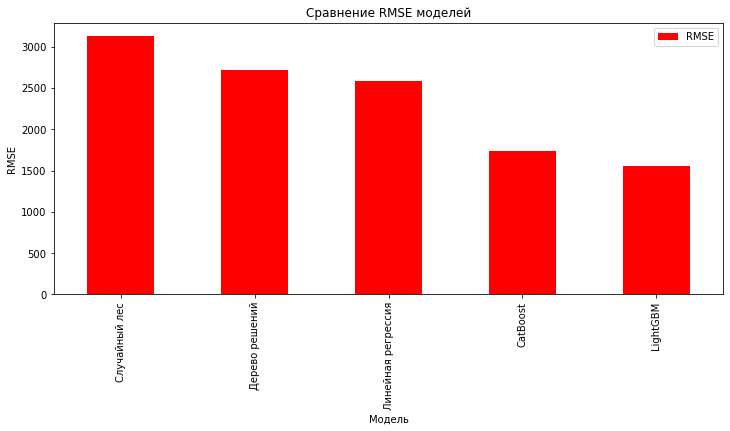

In [88]:
total.sort_values(by='RMSE', ascending=False).plot.bar(y='RMSE', figsize=(12,5), color='red')
plt.title('Сравнение RMSE моделей')
plt.xlabel('Модель')
plt.ylabel('RMSE')
plt.show()

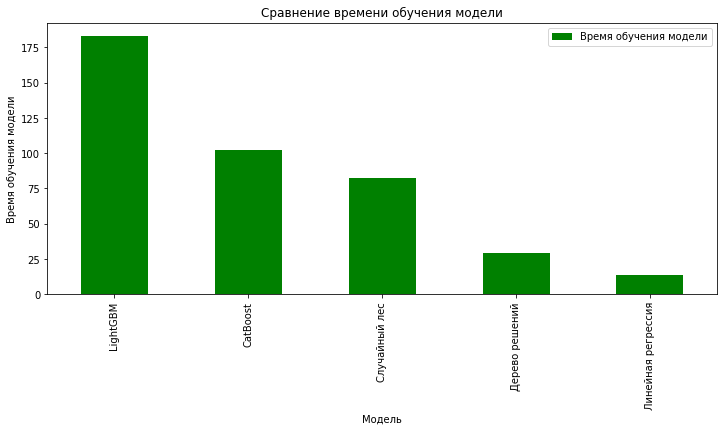

In [89]:
total.sort_values(by='Время обучения модели', ascending=False).plot.bar(y='Время обучения модели', \
                                                                    figsize=(12,5), color='green')
plt.title('Сравнение времени обучения модели')
plt.xlabel('Модель')
plt.ylabel('Время обучения модели')
plt.show()

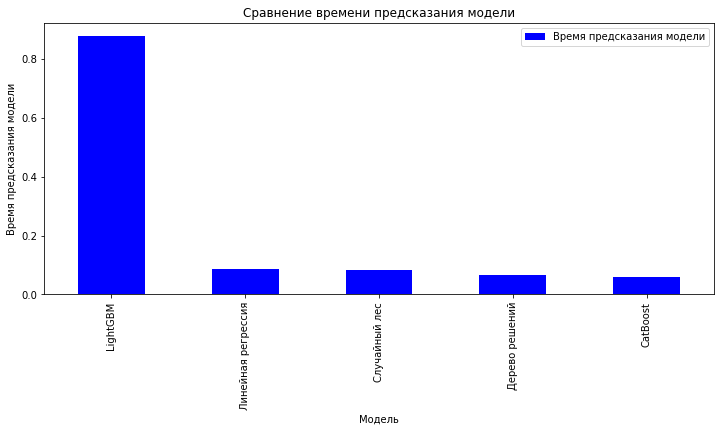

In [90]:
total.sort_values(by='Время предсказания модели', ascending=False).plot.bar\
(y='Время предсказания модели', figsize=(12,5), color='blue')
plt.title('Сравнение времени предсказания модели')
plt.xlabel('Модель')
plt.ylabel('Время предсказания модели')
plt.show()

Из полученных данных видим:
- Только 2 модели имеют метрику RMSE ниже установленного заказчиком порога в 2500. Это CatBoost и LightGMB. Модель LightGMB ошибается значительно меньше, чем CatBoost.
- Быстрее всех обучается модель Линейная регрессия. CatBoost и LightGMB обучаются значительно медленнее других моделей.
- Быстрее всех предсказывает модель CatBoost, а медленнее всех - LightGMB (почти в 6,6 раз медленнее CatBoost).

Для заказчика важны качество предсказаний модели, ее скорость обучения и предсказания.

Исходя из всех данных, лучше выбрать модель <b>CatBoost</b>, так как у нее хороший показатель RMSE, она во много раз быстрее предсказывает, чем LightGMB, и обучается CatBoost почти в 2 раза быстрее, чем LightGMB.

## Проверка модели на тестовой выборке

Выбрали модель CatBoost. Ее лучшие параметры:
- 'depth': 10
- 'has_time': True
- 'l2_leaf_reg': 3
- 'learning_rate': 0.1
- 'random_state': 2501

RMSE CatBoost: 1738.090831036315

Время обучения модели: 264.4337485767901 сек.

Время предсказания модели: 0.1371983401477337 сек.

Проверим модель на тестовой выборке.

In [91]:
fit_tic = time.perf_counter()
model = CatBoostRegressor(depth=10, has_time=True, l2_leaf_reg=3, learning_rate=0.1, \
            cat_features=categorial, loss_function='RMSE', verbose=0, random_state=2501)
model.fit(features_train, target_train)
fit_toc = time.perf_counter()
fit_catboost = fit_toc - fit_tic

pred_tic = time.perf_counter()
predicted_valid = model.predict(features_test)
pred_toc = time.perf_counter()
pred_catboost = pred_toc - pred_tic

rmse_catboost = mean_squared_error(target_test, predicted_valid, squared=False)

print(f'RMSE CatBoost: {rmse_catboost}') 
print(f'Время обучения модели: {fit_catboost} сек.')
print(f'Время предсказания модели: {pred_catboost} сек.')

RMSE CatBoost: 1550.5828397696105
Время обучения модели: 131.7649777019999 сек.
Время предсказания модели: 0.32865891100004774 сек.


RMSE модели 1550, это лучший результат среди всех моделей. Время обучения модели немного увеличилось, а время предсказания уменьшилось. Модель прошла проверку.

А теперь посмотрим, какие из признаков наиболее важны для построения и обучения модели.

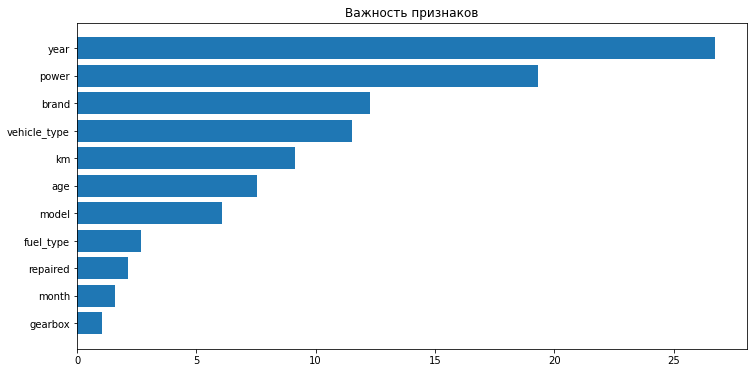

In [92]:
# на основе tree-based метода
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(features_test.columns)[sorted_idx])
plt.title('Важность признаков');

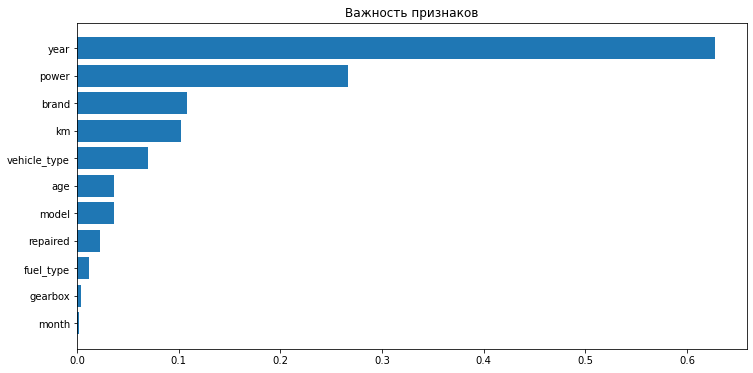

In [93]:
# на основе перемешивания данных в одном столбце и сравнения влияния на итоговую метрику 
perm_importance = permutation_importance(model, features_test, target_test, n_repeats=10, \
                                         random_state=2501)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(features_test.columns)[sorted_idx])
plt.title('Важность признаков');

В обоих методах анализа важности признаков на первом месте - год регистрации автомобиля. Это логично - новые автомобили стоят дороже. На втором месте - мощность двигателя: чем лошадиных сил больше, тем выше цена. На третьем месте - бренд автомобиля. "Имя" некоторых производителей продает само за себя. Остальные признаки менее значимы и меньше влияют на ценообразование.

## Выводы

В ходе данного проекта было сделано:
1. Изучены и подготовлены данные для обучения моделей:
    - удалены дубликаты и заполнены пропуски
    - обработаны аномалии
    - выявлена зависимость между признаками
2. Обучены 5 моделей:
    - Дерево решений
    - Случайный лес
    - Линейная регрессия
    - CatBoost
    - LightGBM
3. Найдены метрики RMSE и время на обучение и предсказание моделей.
4. Выбрана лучшая модель по критериям заказчика - CatBoost.
5. Модель проверена на тестовой выборке и выявлены самые значимые признаки.